# Library imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Model Pipelines & Functions

In [2]:
def LogRegPipeline(C,penalty, solver, max_iter, X_train, y_train, X_test, y_test):
    penalty = penalty
    solver= solver
    max_iter = max_iter
    X_train = X_train
    y_train = y_train
    X_test = X_test
    y_test = y_test
    C=C
    LRpipe = Pipeline([
                     ('std', StandardScaler()),
                     ('lr',LogisticRegression(C=C,penalty = penalty, solver=solver, max_iter=max_iter))
    ])
    model = LRpipe.fit(X_train,y_train)
    print(model)
    print('\n Training Score: ',model.score(X_train,y_train),'\n')

    preds = model.predict(X_test)

    print(classification_report(y_pred=preds, y_true=y_test, zero_division=0))
    
    cm= confusion_matrix(y_pred=preds, y_true=y_test)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [3]:
def DecisionTreePipeline(criterion, max_depth, X_train, y_train, X_test, y_test):
    criterion=criterion
    max_depth=max_depth
    X_train = X_train
    y_train = y_train
    X_test = X_test
    y_test = y_test
    DT_pipe = Pipeline([
        ('dt', DecisionTreeClassifier(criterion=criterion, max_depth=max_depth))
    ])

    model = DT_pipe.fit(X_train, y_train)
    print(model)
    print('\n Training Score: ',model.score(X_train,y_train),'\n')
    preds = model.predict(X_test)

    print(classification_report(y_pred=preds, y_true=y_test, zero_division=0))
    
    cm= confusion_matrix(y_test, preds)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [4]:
def RandomForest(X_train, y_train, X_test, y_test,n_estimators, criterion, bootstrap, max_depth, max_features):
    X_train = X_train
    y_train = y_train
    X_test = X_test
    y_test = y_test
    n_estimators=n_estimators
    criterion=criterion
    bootstrap=bootstrap
    max_depth=max_depth
    max_features=max_features
    rndF = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion,bootstrap=bootstrap, max_depth=max_depth, max_features=max_features)
    model = rndF.fit(X_train, y_train)
    print(model)
    print('\n Training Score: ',model.score(X_train,y_train),'\n')
    preds = model.predict(X_test)

    print(classification_report(y_pred=preds, y_true=y_test, zero_division=0))

    cm= confusion_matrix(y_test, preds)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

In [5]:
def create_splits(X,y, test_size=0.15, random_state=101, stratify=None):
    X = X
    y = y
    random_state = random_state
    test_size = test_size
    stratify = stratify
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= test_size, random_state=random_state, stratify=stratify)
    return(X_train, X_test, y_train, y_test)

# Read Data and Basic Get to know the Data

In [6]:
crashesDf = pd.read_csv('Traffic_Crashes.csv')
crashesDf.head()

,OBJECTID,jurisdiction,number_of_lanes,fatal_count,young,deer,crash_id,lighting,occupants,b_level_count,...,highway_classification,crash_type,train,weather,property_damage,lane_departure,primary_road,alcohol,drug,elderly
0,1,4.0,2,0,0,0,7929715,1,2,0,...,9,4,0,2,1,0,HENDRIE,0,0,0
1,2,5.0,0,0,0,0,7931144,1,3,0,...,9,4,0,1,1,0,E STATE FAIR,0,0,0
2,3,4.0,2,0,0,0,7854992,1,0,0,...,9,5,0,2,1,0,FOREST AVE,0,0,0
3,4,4.0,2,0,0,0,7940235,1,3,0,...,9,8,0,1,1,0,W FOREST AVE,0,0,0
4,5,1.0,1,0,0,0,7932532,1,1,0,...,3,1,0,5,1,1,109C,0,0,0


In [7]:
missing_values = crashesDf.isna().sum()
print('The columns that are missing values are:')
missing_values[missing_values>0]

The columns that are missing values are:


jurisdiction    12716
hour               29
primary_road        1
dtype: int64

__Dropping the two columns 'OBJECTID',  'crash_id'__

__'jurisdiction' has 12K values missing, this column has categorical values (codes) and imputing them with central mesaures or most frequent value doesn't add any value. Also it can mis-lead the project purpose. Same applies to the 'hour' column__

__Dropping them in this case is good option__

In [8]:
# Checking the different road_condition
crashesDf['road_condition'].value_counts()

1     105656
2      25481
3       7015
4       6736
6       1280
8        913
98       500
97       387
0        221
7         45
5         29
10         6
9          3
Name: road_condition, dtype: int64

__As per one of the nomenclature given in 2008 for Wyoming__ [link](https://forums.radioreference.com/threads/wydot-codes.126185/#:~:text=There%27s%20nothing%20particularly%20confidential%20or%20secret%20about%20the,consistently%20report%20what%20he%20sees%20in%20real%20time.)
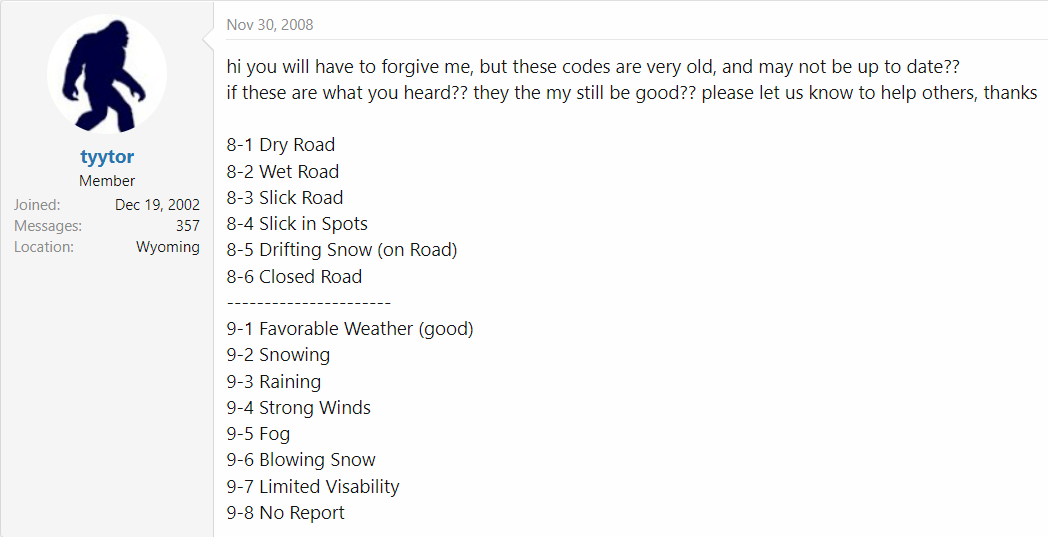

__The codes may vary as per the states, in the current data, we have the code 99 but it is not mentioned in the image. The help from an SME can be beneficial.__

In [9]:
# Percentage of crashes occurred at top 10 primary roads in Detroit
crashesDf['primary_road'].value_counts()[:10]*100/ len(crashesDf['primary_road'])

I-94           1.960586
I-75           1.853351
7 MILE         1.474992
MCNICHOLS      1.181612
GRATIOT        1.164751
GREENFIELD     1.062911
WARREN         1.016375
8 MILE         1.006933
GRATIOT AVE    0.905093
JEFFERSON      0.902396
Name: primary_road, dtype: float64

In [10]:
# Percentage of crashes occurred at top 10 intersecting roads in Detroit
crashesDf['intersecting_road'].value_counts()[:10]*100/ len(crashesDf['intersecting_road'])

WARREN         1.269289
7 MILE         1.243660
MCNICHOLS      1.042004
LIVERNOIS      0.922629
OUTER          0.887558
SCHAEFER       0.821463
WOODWARD       0.751322
DAVISON        0.743903
8 MILE         0.721647
GRAND RIVER    0.675785
Name: intersecting_road, dtype: float64

__We can step the primary roads into others except the top 10 roads but the top 10 primary roads covers less than 15% of the crashes and there are over 7K primary roads. So stepping all the primary roads into others except top 10 of them won't be good option as the variance in the data would be very low.__

## Cleaning the Data

In [11]:
crashesDfClean = crashesDf.drop(columns=['OBJECTID', 'crash_id'], axis =1)

In [12]:
crashesDfNAClean = crashesDfClean.dropna(axis=0)

In [13]:
vals =[1,0]
for i in vals:
  for j in vals:
    for k in vals:
      print('A:',i, ' D:',j, ' E:',k,
      len(crashesDfNAClean[(crashesDfNAClean['alcohol']==i)&(crashesDfNAClean['drug']==j)&(crashesDfNAClean['elderly']==k)]))

A: 1  D: 1  E: 1 40
A: 1  D: 1  E: 0 289
A: 1  D: 0  E: 1 167
A: 1  D: 0  E: 0 2597
A: 0  D: 1  E: 1 44
A: 0  D: 1  E: 0 298
A: 0  D: 0  E: 1 15181
A: 0  D: 0  E: 0 116928


__There are 8 classes that can be described in the way shown below:__

A: 1  D: 1  E: 1 __40__ Drug & Alcohol Consumed Elder 

A: 1  D: 1  E: 0 __316__      Drug & Alcohol Consumed Youth

A: 1  D: 0  E: 1 __172__      Alcohol Consumed Elder

A: 1  D: 0  E: 0 __2812__     Alcohol Consumed Youth

A: 0  D: 1  E: 1 __46__       Drug Consumed Elder

A: 0  D: 1  E: 0 __332__      Drug Consumed Youth

A: 0  D: 0  E: 1 __16215__    Un-Consumed Elder

A: 0  D: 0  E: 0 __128339__   Un-Consumed Youth

__Differentiating the columns based on their values such as boolean columns and columns having more than two values__

In [14]:
bi_value_cats = ['young', 'deer', 'pedestrian', 'dis_ctrl_i', 'school_bus', 'hit_and_run', 'bicycle', 'motorcycle',
                 'red_light_running', 'train', 'property_damage']

more_value_cats = ['lane_departure', 'weather', 'crash_type', 'highway_classification','weekday', 'most_severe_injury', 'a_level_count',
                   'b_level_count', 'c_level_count', 'number_of_units', 'road_condition', 'lighting', 'fatal_count', 'number_of_lanes',
                   'jurisdiction']

more_than_20_value_cats = ['hour','speed_limit', 'occupants']

## Labelling the target column

In [15]:
# Class Fragmentation as per target and then combining them into One Dataframe
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    dfADE = crashesDfNAClean[(crashesDfNAClean['alcohol']==1)&(crashesDfNAClean['drug']==1)&(crashesDfNAClean['elderly']==1)]
    dfADE['target'] = 'Alcohol & Drug Consumed Elder'
    dfAE = crashesDfNAClean[(crashesDfNAClean['alcohol']==1)&(crashesDfNAClean['drug']==0)&(crashesDfNAClean['elderly']==1)]
    dfAE['target'] = 'Alcohol Consumed Elder'
    dfDE = crashesDfNAClean[(crashesDfNAClean['alcohol']==0)&(crashesDfNAClean['drug']==1)&(crashesDfNAClean['elderly']==1)]
    dfDE['target'] = 'Drug Consumed Elder'
    dfE = crashesDfNAClean[(crashesDfNAClean['alcohol']==0)&(crashesDfNAClean['drug']==0)&(crashesDfNAClean['elderly']==1)]
    dfE['target'] = 'Non-Consumed Elder'
    dfADY = crashesDfNAClean[(crashesDfNAClean['alcohol']==1)&(crashesDfNAClean['drug']==1)&(crashesDfNAClean['elderly']==0)]
    dfADY['target'] = 'Alcohol & Drug Consumed Youth'
    dfAY = crashesDfNAClean[(crashesDfNAClean['alcohol']==1)&(crashesDfNAClean['drug']==0)&(crashesDfNAClean['elderly']==0)]
    dfAY['target'] = 'Alcohol Consumed Youth'
    dfDY = crashesDfNAClean[(crashesDfNAClean['alcohol']==0)&(crashesDfNAClean['drug']==1)&(crashesDfNAClean['elderly']==0)]
    dfDY['target'] = 'Drug Consumed Youth'
    dfY = crashesDfNAClean[(crashesDfNAClean['alcohol']==0)&(crashesDfNAClean['drug']==0)&(crashesDfNAClean['elderly']==0)]
    dfY['target'] = 'Non-Consumed Youth'

    crashesDfNAClean = pd.concat([dfADE,dfAE,dfDE,dfE,dfADY,dfAY, dfDY, dfY], axis=0)
crashesDfNAClean['target'].value_counts()

Non-Consumed Youth               116928
Non-Consumed Elder                15181
Alcohol Consumed Youth             2597
Drug Consumed Youth                 298
Alcohol & Drug Consumed Youth       289
Alcohol Consumed Elder              167
Drug Consumed Elder                  44
Alcohol & Drug Consumed Elder        40
Name: target, dtype: int64

__There is a huge class imbalance in the data, we will train the Machine Learning model with the imbalance and then will try to use upsampling methods to balance the classes__

# EDA

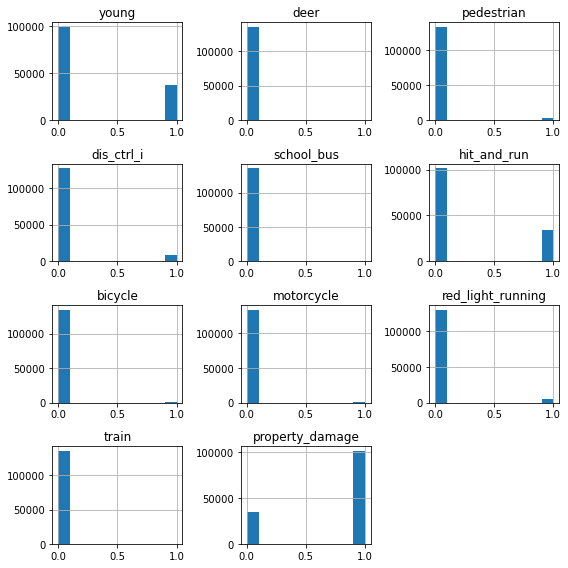

In [16]:
# Categorical features having boolean values
crashesDfNAClean[bi_value_cats].hist(figsize=(8,8))
plt.tight_layout()
plt.show()

__The columns such as 'deer', 'school_bus', 'train', can be dropped while modeling as these columns are singleton__

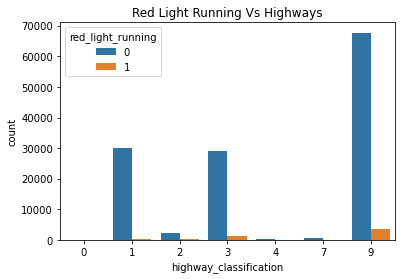

In [17]:
plt.title('Red Light Running Vs Highways')
sns.countplot(data=crashesDfNAClean[['red_light_running', 'highway_classification']], x = 'highway_classification', hue='red_light_running')
plt.show()

__Red_light_running as per the highway_classification__

Seems like the local roads are the road where the red_light_running occurs more than other highways

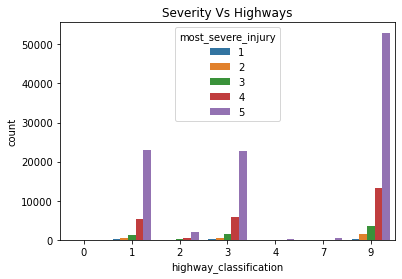

In [18]:
plt.title('Severity Vs Highways')
sns.countplot(data=crashesDfNAClean[['most_severe_injury', 'highway_classification']], x = 'highway_classification', hue='most_severe_injury',)
plt.show()

__Most of the accidents have happened in the local roads where the red_light_running also happens most, but most of them are very less severe.__
___This classification is taken from the paper ['Analysis of Crash Severity Based on Vehicle Damage and Occupant Injuries'](https://cpb-us-w2.wpmucdn.com/sites.uwm.edu/dist/e/546/files/2018/02/TRR-2013-Vehicle-Damage-Injury-Severity-2ctdws1.pdf)___

The Severity of crashes: 
- 5: Property Damage Only
- 4: Possible Injury
- 3: Nonincapacitating Injury
- 2: Incapacitating Injury
- 1: Fatal Injury


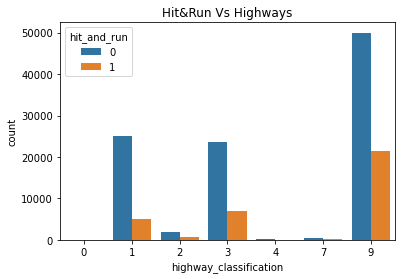

In [19]:
plt.title('Hit&Run Vs Highways')
sns.countplot(data=crashesDfNAClean[['hit_and_run', 'highway_classification']], x = 'highway_classification', hue='hit_and_run')
plt.show()

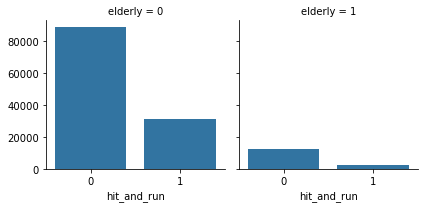

In [20]:
#plt.title('Number of cars sold as per their make in respective years')
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    g = sns.FacetGrid(crashesDfNAClean[['hit_and_run', 'highway_classification','drug','alcohol','elderly']], col='elderly')
    g.map(sns.countplot, "hit_and_run")
    plt.show()

__This suggests that the young drivers are very prone to accidents than elder citizens__

In [21]:
((crashesDfNAClean[['alcohol','elderly','drug','hit_and_run']].groupby(by=['elderly','alcohol','drug']).agg({'hit_and_run':'count'})/ crashesDfNAClean[['elderly','hit_and_run']].groupby(by=['elderly']).count())*100)

hit_and_run
elderly alcohol drug             
0       0       0       97.349141
                1        0.248102
        1       0        2.162149
                1        0.240609
1       0       0       98.373510
                1        0.285122
        1       0        1.082167
                1        0.259202

__After checking the percent values of the crashes, we found the almost similar distribution within the alcohol and drug__

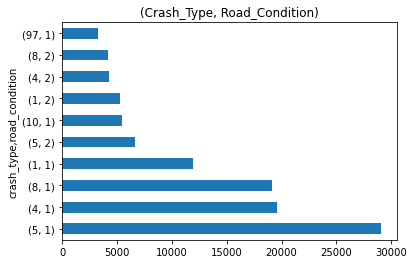

In [22]:
plt.title('(Crash_Type, Road_Condition)')
crashesDfNAClean[['crash_type', 'road_condition']].value_counts()[:10].plot.barh()
plt.show()

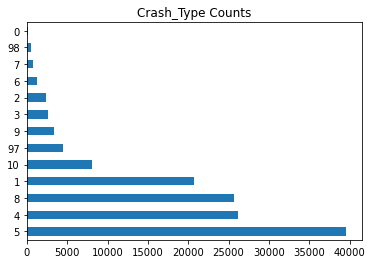

In [23]:
plt.title('Crash_Type Counts')
crashesDfNAClean['crash_type'].value_counts().plot.barh()
plt.show()

__Drawing an analogy for the crash_type codes from Maryland Crash Dataset__

It can interpreted that the most of the crashes happen 'Same Direction Rear End' but for other codes, the accurate mapping won't be possible as the factors for crashes in Detroit wouldn't be same as Maryland.
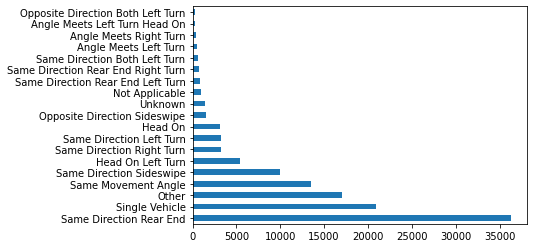

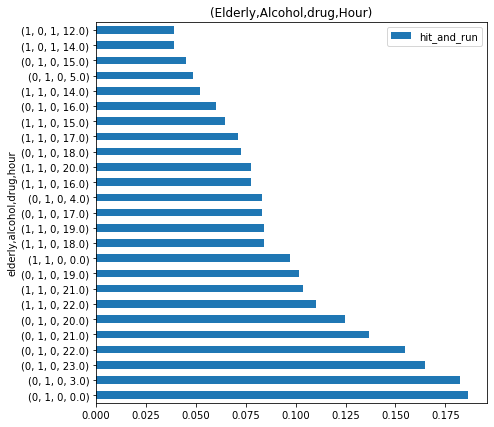

In [24]:
group_vals = (crashesDfNAClean[['drug','alcohol','elderly','hour','hit_and_run']].groupby(by=['elderly','alcohol','drug','hour'],sort=True).agg({'hit_and_run':'count'})/ crashesDfNAClean[['elderly','hit_and_run']].groupby(by=['elderly']).count())*100
#plt.title()
group_vals.sort_values(by='hit_and_run',ascending=False)[50:75].plot.barh(figsize=(7,7),title='(Elderly,Alcohol,drug,Hour)')
plt.show()

- __Most of the people who consumes alcohol or drug, their crashes are mostly occured around midnight while the people who didn't consume drug or alcohol, their crashes were mostly reocrded between 2pm and 6pm.__ 

- __With the proportion it is known that young people are more likely to drink and drive as compared to elderly people.__

- __Most of the crashes that happened, which involve the people who haven't consumed drug or alcohol occurred at the evening pick hours between 3pm to 7pm__

__Inference:__ From these points we can infer that the inspection or patrolling duty from evening to midnight should be increased, this might help to find more people who consumes alcohol or drug and drive.

# Modeling

## Column Selection for modeling

In [25]:
# Dropping the features that we won't use in the model
modelDF=crashesDfNAClean.drop(columns=['deer','dis_ctrl_i','intersecting_road','primary_road','young',
                                       'datetime','alcohol','drug','elderly','school_bus','train'])
modelDF.columns

Index(['jurisdiction', 'number_of_lanes', 'fatal_count', 'lighting',
       'occupants', 'b_level_count', 'pedestrian', 'road_condition',
       'number_of_units', 'speed_limit', 'hour', 'hit_and_run', 'bicycle',
       'motorcycle', 'a_level_count', 'c_level_count', 'most_severe_injury',
       'red_light_running', 'weekday', 'highway_classification', 'crash_type',
       'weather', 'property_damage', 'lane_departure', 'target'],
      dtype='object')

## Train Test Split

In [26]:
# Assignment of features to X and y
X = modelDF.drop(columns='target')
y = modelDF['target']

In [27]:
# Train Test Split
X_train, X_test, y_train, y_test = create_splits(X=X,y=y, stratify=y)

## Logistic Regression with the imbalanced classes

Pipeline(steps=[('std', StandardScaler()),
                ('lr', LogisticRegression(C=1, max_iter=1000))])

 Training Score:  0.8625056417734264 

                               precision    recall  f1-score   support

Alcohol & Drug Consumed Elder       0.00      0.00      0.00         6
Alcohol & Drug Consumed Youth       0.00      0.00      0.00        43
       Alcohol Consumed Elder       0.00      0.00      0.00        25
       Alcohol Consumed Youth       0.29      0.01      0.01       390
          Drug Consumed Elder       0.00      0.00      0.00         7
          Drug Consumed Youth       0.00      0.00      0.00        45
           Non-Consumed Elder       0.00      0.00      0.00      2277
           Non-Consumed Youth       0.86      1.00      0.93     17539

                     accuracy                           0.86     20332
                    macro avg       0.14      0.13      0.12     20332
                 weighted avg       0.75      0.86      0.80     2033

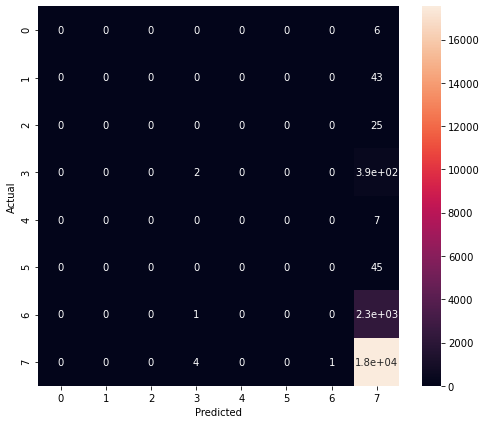

In [28]:
# Logistic Regression Pipeline
LogRegPipeline(C=1,penalty = 'l2', solver='lbfgs', max_iter=1000,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

__With the imbalance, the model was only able to do good on 'Non-Consumed Youth' and for others it couldn't do well.__

__The data has very low variance__

__We can try upsampling to balance the classes and check the progress__

### Up-Sampling

__We are using a library by the name IMBLEARN. SMOTE method is used which generates the values using K-nearest approach (by default the n for K-near-neighbour is 5 and we will go with the defaults.)__

In [29]:
# Counts of classes with respect to their record occurrence in the data
y.value_counts()

Non-Consumed Youth               116928
Non-Consumed Elder                15181
Alcohol Consumed Youth             2597
Drug Consumed Youth                 298
Alcohol & Drug Consumed Youth       289
Alcohol Consumed Elder              167
Drug Consumed Elder                  44
Alcohol & Drug Consumed Elder        40
Name: target, dtype: int64

In [30]:
# SMOTE Upsampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

Alcohol Consumed Elder           116928
Alcohol & Drug Consumed Elder    116928
Drug Consumed Youth              116928
Non-Consumed Elder               116928
Alcohol Consumed Youth           116928
Alcohol & Drug Consumed Youth    116928
Drug Consumed Elder              116928
Non-Consumed Youth               116928
Name: target, dtype: int64

__Now that we have synthetic, we will train the model with the obtained values__

In [31]:
# Train Test Splits
X_sm_train, X_sm_test, y_sm_train, y_sm_test = create_splits(X_sm,y_sm)

Pipeline(steps=[('std', StandardScaler()),
                ('lr', LogisticRegression(C=1, max_iter=1000))])

 Training Score:  0.38373558375570677 

                               precision    recall  f1-score   support

Alcohol & Drug Consumed Elder       0.38      0.50      0.43     17707
Alcohol & Drug Consumed Youth       0.44      0.26      0.33     17433
       Alcohol Consumed Elder       0.30      0.30      0.30     17358
       Alcohol Consumed Youth       0.44      0.41      0.42     17378
          Drug Consumed Elder       0.40      0.41      0.40     17621
          Drug Consumed Youth       0.45      0.33      0.38     17384
           Non-Consumed Elder       0.28      0.46      0.35     17794
           Non-Consumed Youth       0.54      0.42      0.47     17639

                     accuracy                           0.39    140314
                    macro avg       0.40      0.39      0.39    140314
                 weighted avg       0.40      0.39      0.39    1403

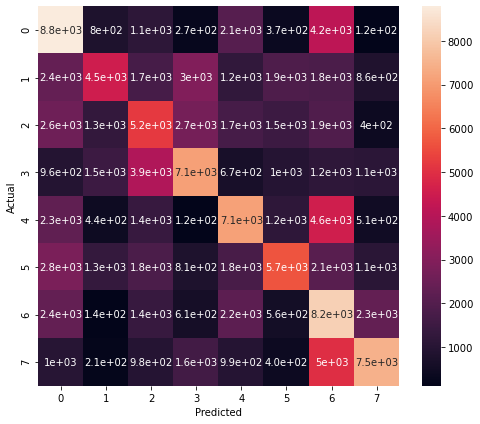

In [32]:
# Logistic Regression Pipeline
LogRegPipeline(C=1,penalty = 'l2', solver='lbfgs', max_iter=1000,
               X_train=X_sm_train,y_train=y_sm_train,X_test=X_sm_test,y_test=y_sm_test)

- __Similarly after training the model such as Decision Tree and Random Forest, similar results were obtained.__

- __With the more number of co-related classes, the model gets confused, so instead of differentiating the classes on the basis of elder or youth, we will focus on whether a person has alcohol or drug consumed.__

- __A good alternative can be if we reduce the number of classes and then check.__

- __Since we are focusing whether the person in the crash was influenced by alcohol or drug, we will categorize them into three classes 'Drug', 'Alcohol' and 'Clean'__

__Note:__ The case when the person has consumed both drug and alcohol, they are considered as Drug as per the severity of consumption 

## Class Reduction

__First we have fragmented the classes as per the three column values (alcohol, elderly and drug) and then merged them into one.__

In [33]:
# Class Fragmentation as per target and then combining them into One Dataframe
drug_consumptionDf = crashesDfNAClean[(crashesDfNAClean['alcohol']==0)&(crashesDfNAClean['drug']==1)]
print('Drug: ',drug_consumptionDf.shape)

alcohol_consumptionDf = crashesDfNAClean[(crashesDfNAClean['alcohol']==1)&(crashesDfNAClean['drug']==0)]
print('Alcohol: ',alcohol_consumptionDf.shape)

alcohol_drug_consumptionDf = crashesDfNAClean[(crashesDfNAClean['alcohol']==1)&(crashesDfNAClean['drug']==1)]
print('Alcohol Drug: ',alcohol_drug_consumptionDf.shape)

unconsumedDf = crashesDfNAClean[(crashesDfNAClean['alcohol']==0)&(crashesDfNAClean['drug']==0)]
print('Unconsumed: ',unconsumedDf.shape)

print('Summation of categorized records',(drug_consumptionDf.shape[0] + alcohol_consumptionDf.shape[0]+ alcohol_drug_consumptionDf.shape[0]+unconsumedDf.shape[0]))
print('CrashesDF records: ', crashesDfNAClean.shape[0])

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    drug_consumptionDfNew = pd.concat([drug_consumptionDf,alcohol_drug_consumptionDf],axis=0)
    drug_consumptionDfNew['target'] = 'Drug'
    alcohol_consumptionDf['target'] = 'Alcohol'
    unconsumedDf['target']='Clean'

crashesEditedDf = pd.concat([drug_consumptionDfNew, alcohol_consumptionDf, unconsumedDf], axis=0)
crashesEditedDf['target'].value_counts()

Drug:  (342, 36)
Alcohol:  (2764, 36)
Alcohol Drug:  (329, 36)
Unconsumed:  (132109, 36)
Summation of categorized records 135544
CrashesDF records:  135544


Clean      132109
Alcohol      2764
Drug          671
Name: target, dtype: int64

In [34]:
# Total Columns
crashesEditedDf.columns

Index(['jurisdiction', 'number_of_lanes', 'fatal_count', 'young', 'deer',
       'lighting', 'occupants', 'b_level_count', 'pedestrian', 'dis_ctrl_i',
       'datetime', 'road_condition', 'number_of_units', 'school_bus',
       'speed_limit', 'hour', 'hit_and_run', 'bicycle', 'motorcycle',
       'a_level_count', 'c_level_count', 'most_severe_injury',
       'red_light_running', 'weekday', 'intersecting_road',
       'highway_classification', 'crash_type', 'train', 'weather',
       'property_damage', 'lane_departure', 'primary_road', 'alcohol', 'drug',
       'elderly', 'target'],
      dtype='object')

In [35]:
# Dropping the features which we don't want in the model
crashesEditedDf=crashesEditedDf.drop(columns=['datetime','intersecting_road','primary_road','train','school_bus',
                             'elderly','young','drug',])

In [36]:
# Assigning features to X and y
X = crashesEditedDf.drop(columns=['target'])
y = crashesEditedDf['target']

In [37]:
# SMOTE Upsampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

Alcohol    132109
Drug       132109
Clean      132109
Name: target, dtype: int64

In [38]:
# Train Test Split
X_sm_train, X_sm_test, y_sm_train, y_sm_test = create_splits(X_sm,y_sm,stratify=y_sm)

Pipeline(steps=[('std', StandardScaler()),
                ('lr', LogisticRegression(C=1, max_iter=1000))])

 Training Score:  0.8068553210815818 

              precision    recall  f1-score   support

     Alcohol       0.81      0.97      0.88     19817
       Clean       0.80      0.91      0.85     19817
        Drug       0.82      0.55      0.66     19816

    accuracy                           0.81     59450
   macro avg       0.81      0.81      0.80     59450
weighted avg       0.81      0.81      0.80     59450



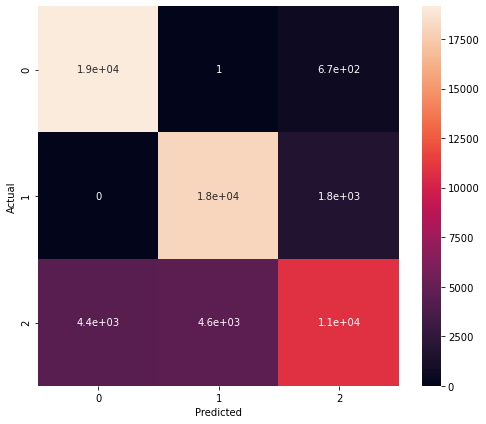

In [39]:
# Logistic Regression Pipeline
LogRegPipeline(C=1,penalty = 'l2', solver='lbfgs', max_iter=1000,
               X_train=X_sm_train,y_train=y_sm_train,X_test=X_sm_test,y_test=y_sm_test)

## Decision Tree

__Parameters selection__

Pipeline(steps=[('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])

 Training Score:  0.8037711093366422 

              precision    recall  f1-score   support

     Alcohol       0.81      0.98      0.89     19817
       Clean       0.76      0.97      0.85     19817
        Drug       0.90      0.47      0.62     19816

    accuracy                           0.81     59450
   macro avg       0.82      0.81      0.79     59450
weighted avg       0.82      0.81      0.79     59450



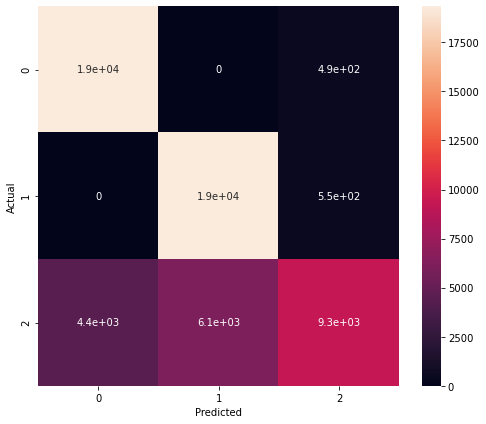

In [40]:
# DecisionTree Pipeline
DecisionTreePipeline(criterion='entropy',max_depth=4,
                    X_train=X_sm_train, y_train=y_sm_train, X_test=X_sm_test, y_test=y_sm_test)

__The precision for the drug is significantly low and the recall for the drug is maximum of all, that means the model was able to recall the values maximum of the time (Model memorized the values)__

## GridSearch on Decision Tree

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = [
  {'dt__criterion': ['entropy','gini'], 'dt__min_samples_split':[2,3] ,'dt__max_depth': [1,2,3,4,5]}
 ]
DT_pipe = Pipeline([
        ('dt', DecisionTreeClassifier(min_samples_split=2,criterion='entropy', max_depth=3))
    ])

gcv_results = GridSearchCV(estimator=DT_pipe, param_grid=param_grid, scoring='accuracy', refit=True)
gcv_results = gcv_results.fit(X_sm_train, y_sm_train)

In [43]:
gcv_results.best_estimator_
#gcv_results.best_score_

Pipeline(steps=[('dt', DecisionTreeClassifier(max_depth=5))])

              precision    recall  f1-score   support

     Alcohol       0.82      0.97      0.89     19817
       Clean       0.78      0.94      0.85     19817
        Drug       0.85      0.54      0.66     19816

    accuracy                           0.81     59450
   macro avg       0.82      0.81      0.80     59450
weighted avg       0.82      0.81      0.80     59450



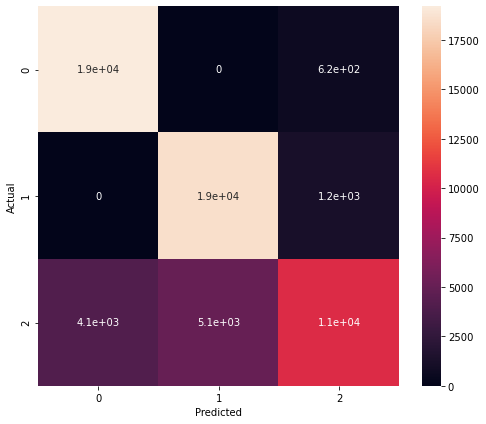

In [44]:
preds = gcv_results.predict(X_sm_test)
print(classification_report(y_true=y_sm_test, y_pred=preds))

cm= confusion_matrix(y_true=y_sm_test, y_pred=preds)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

__For max_depth=15, it almost gave the perfect predictions but using the trees with maximum value of depth is computationally expensive and the probability of getting a low score on unseen data increases.__

## Random Forest

__Although it is not preferable to use powerful algorithm such as RandomForest as it memorizes the values given in the training but when the new test values are given, then it won't perform well__

RandomForestClassifier(criterion='entropy', max_depth=6)

 Training Score:  0.806178516194338 

              precision    recall  f1-score   support

     Alcohol       0.80      1.00      0.89     19817
       Clean       0.81      0.88      0.84     19817
        Drug       0.82      0.55      0.66     19816

    accuracy                           0.81     59450
   macro avg       0.81      0.81      0.80     59450
weighted avg       0.81      0.81      0.80     59450



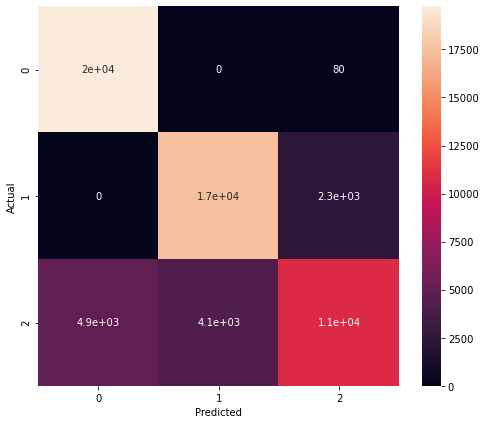

In [45]:
RandomForest(X_train=X_sm_train, y_train=y_sm_train, X_test=X_sm_test, y_test=y_sm_test,
             n_estimators=100, criterion='entropy',bootstrap=True, max_depth=6, max_features='auto',)

## Best Estimator

In [46]:
import warnings
with warnings.catch_warnings():
    param_grid = [
      {'LR__solver':['sag','saga','newton-cg']}
     ]
    LR_pipe = Pipeline([
            ('LR', LogisticRegression(C=0.01,penalty = 'l2', max_iter=1000))
        ])

    gcv_results = GridSearchCV(estimator=LR_pipe, param_grid=param_grid, scoring='accuracy', refit=True)
    gcv_results = gcv_results.fit(X_sm_train, y_sm_train)
    print(gcv_results.best_estimator_)
    print(gcv_results.best_score_)

Pipeline(steps=[('LR',
                 LogisticRegression(C=0.01, max_iter=1000,
                                    solver='newton-cg'))])
0.8075113438652808


              precision    recall  f1-score   support

     Alcohol       0.81      0.97      0.89     19817
       Clean       0.79      0.91      0.85     19817
        Drug       0.82      0.54      0.66     19816

    accuracy                           0.81     59450
   macro avg       0.81      0.81      0.80     59450
weighted avg       0.81      0.81      0.80     59450



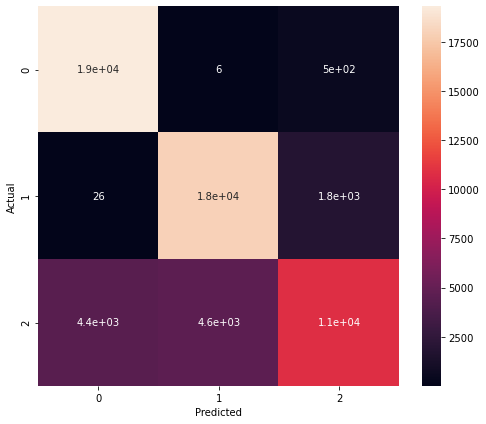

In [47]:
preds = gcv_results.predict(X_sm_test)
print(classification_report(y_true=y_sm_test, y_pred=preds))

cm= confusion_matrix(y_true=y_sm_test, y_pred=preds)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

- __The best estimator is the shown above, the solver is 'Newton-CG' as it was able to deal well with the all the three classes than other solvers, although there is not vast differences in the results of all the models__
- __'LBFGS' is not used in the Grid Search as it is not able to converge in 1000 iterations__
- __In terms of computing time, Decision tree was the fastest of all, but it shows more deviation among precision and recall than the deviation in Logistic Regression, that's why we are selecting Logistic Regression as the best estimator__

# Conclusion

- __Overall, we were able to predict whether the person in the crash has consumed alcohol or drug.__

- __Although, the overall accuracy after balancing the classes dropped from 86% to 81% but the the model with up-sampled values can predict the classes better than before.__

- __The Logistic Regression model with the solver 'SAG' was the best estimator__

- __A huge class imbalance was encountered for the class Drug, creating synthetic values helped the model to get some variance. Also as per the inference if the patrolling of the police is increased from evening to mid-night, more drug or alcohol crashes can be encountered__

- __For extra feature engineering, the guidance from SME on the features such as dis_ctrl_i, young etc can be figured. Also to know some deviation of values from overall values (The road condition code we found was different than the code in Wyoming)__

- __As the primary goal of this project is to predict presence of matter, a new feature such as what kind of test was taken, whether the person provided consent for the test or rejected it.__
